In [49]:
# 🧠 Zentro – Credit Default Risk Prediction. 
# This project uses Fannie Mae historical loan data to build a machine learning model that predicts the probability of loan default.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import xgboost as xgb
import shap


/Users/shalbulov/Downloads/for vs code/zentro-risk-prediction/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

df = pd.read_csv("2024Q4.csv", sep="|", header=None)
df.head()


/var/folders/m0/whtgxt194wncw5j97grk0vl80000gn/T/ipykernel_4922/1252978787.py:3: DtypeWarning: Columns (101,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2024Q4.csv", sep="|", header=None)


,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,NaN,138923847,102024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
1,NaN,138923847,112024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
2,NaN,138923847,122024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
3,NaN,138923848,102024,B,Other,Other,NaN,5.625,5.625,419000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
4,NaN,138923848,112024,B,Other,Other,NaN,5.625,5.625,419000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN


In [4]:
import pandas as pd

glossary = pd.read_excel("crt-file-layout-and-glossary.xlsx")
print(glossary.columns)
print(glossary.head())


Index(['Field Position', 'Field Name', 'Description', 'Enumerations',
       'Date Bound Notes', 'Respective Disclosure Notes', 'CAS', 'CIRT',
       'Single-Family (SF) Loan Performance', 'Type', 'Max Length'],
      dtype='object')
   Field Position                Field Name  \
0               1         Reference Pool ID   
1               2           Loan Identifier   
2               3  Monthly Reporting Period   
3               4                   Channel   
4               5               Seller Name   

                                         Description  \
0        A unique identifier for the reference pool.   
1         A unique identifier for the mortgage loan.   
2  The month and year that pertains to the servic...   
3  The origination channel used by the party that...   
4  The name of the entity that delivered the mort...   

                                Enumerations  \
0                                        NaN   
1                                        NaN   
2 

In [5]:
df = pd.read_csv("2024Q4.csv", sep="|", header=None)
column_names = glossary['Field Name'].tolist()

# Если количество совпадает (110), переименовываем
df.columns = column_names

df.head()

/var/folders/m0/whtgxt194wncw5j97grk0vl80000gn/T/ipykernel_4922/510068862.py:1: DtypeWarning: Columns (101,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2024Q4.csv", sep="|", header=None)


,Reference Pool ID,Loan Identifier,Monthly Reporting Period,Channel,Seller Name,Servicer Name,Master Servicer,Original Interest Rate,Current Interest Rate,Original UPB,...,ARM Plan Number,Borrower Assistance Plan,High Loan to Value (HLTV) Refinance Option Indicator,Deal Name,Repurchase Make Whole Proceeds Flag,Alternative Delinquency Resolution,Alternative Delinquency Resolution Count,Total Deferral Amount,Payment Deferral Modification Event Indicator,Interest Bearing UPB
0,NaN,138923847,102024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
1,NaN,138923847,112024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
2,NaN,138923847,122024,R,Other,Nationstar Mortgage LLC,NaN,6.990,6.990,618000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
3,NaN,138923848,102024,B,Other,Other,NaN,5.625,5.625,419000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN
4,NaN,138923848,112024,B,Other,Other,NaN,5.625,5.625,419000.0,...,NaN,7,N,NaN,NaN,7,NaN,NaN,7,NaN


Alternative Delinquency Resolution         100.0
Number of Borrowers                        100.0
Loan Purpose                               100.0
Property Type                              100.0
Number of Units                            100.0
                                           ...  
Co-Borrower Credit Score At Issuance         0.0
Borrower Credit Score Current                0.0
Co-Borrower Credit Score Current             0.0
Current Period Modification Loss Amount      0.0
Interest Bearing UPB                         0.0
Length: 110, dtype: float64


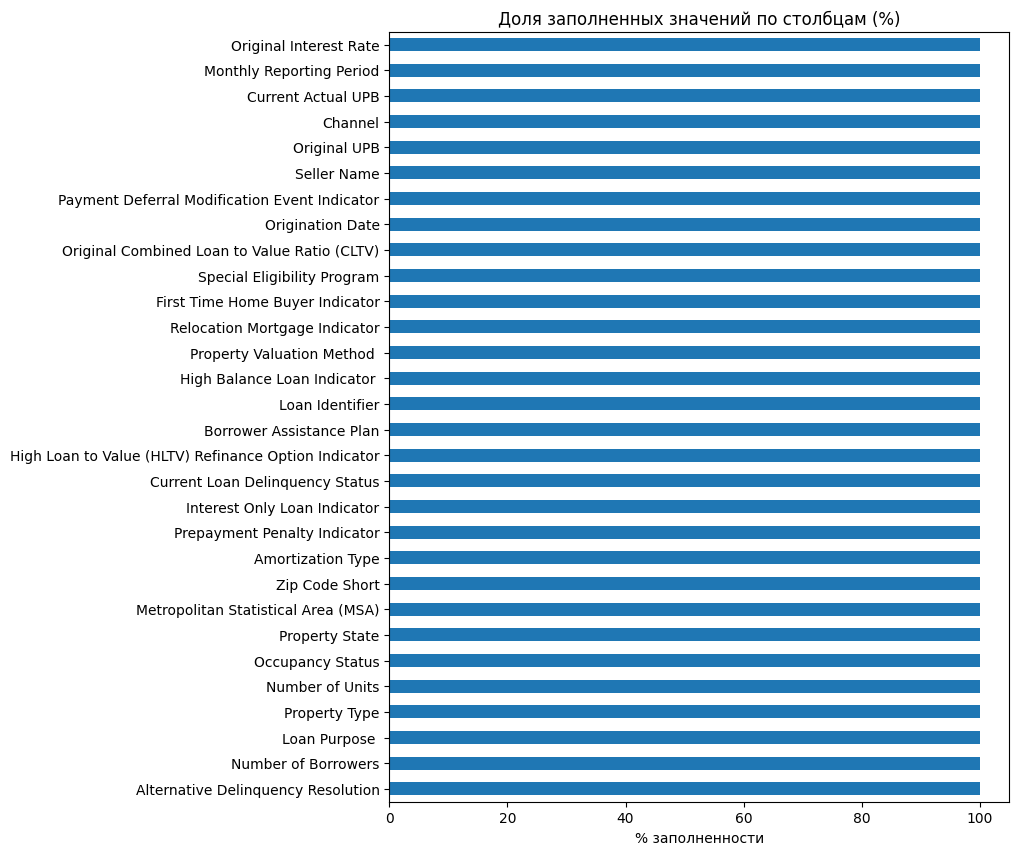

In [6]:
import matplotlib.pyplot as plt

# Количество заполненных значений по каждому столбцу (в %)
fill_rate = df.notnull().mean().sort_values(ascending=False) * 100
print(fill_rate)

# Визуализация заполненности (top-30)
fill_rate.head(30).plot(kind='barh', figsize=(8,10))
plt.title('Доля заполненных значений по столбцам (%)')
plt.xlabel('% заполненности')
plt.show()


In [7]:
# Удаляем столбцы, где все значения пустые
df = df.dropna(axis=1, how='all')
print("После удаления пустых столбцов:", df.shape)


После удаления пустых столбцов: (508281, 52)


In [9]:
print(df.columns.tolist())


['Loan Identifier', 'Monthly Reporting Period', 'Channel', 'Seller Name', 'Servicer Name', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'First Payment Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LTV)', 'Original Combined Loan to Value Ratio (CLTV)', 'Number of Borrowers', 'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination', 'Co-Borrower Credit Score at Origination', 'First Time Home Buyer Indicator', 'Loan Purpose ', 'Property Type', 'Number of Units', 'Occupancy Status', 'Property State', 'Metropolitan Statistical Area (MSA)', 'Zip Code Short', 'Mortgage Insurance Percentage', 'Amortization Type', 'Prepayment Penalty Indicator', 'Interest Only Loan Indicator', 'Current Loan Delinquency Status', 'Loan Payment History', 'Modification Flag', 'Zero Balance Code', 'Zero Balance Effective Date', 'UPB at 

In [10]:
# Выбираем столбцы с низкой заполненностью
low_fill_cols = fill_rate[fill_rate < 90].index.tolist()  # Например, < 90%


In [11]:
# Только столбцы, которые есть и в df, и в low_fill_cols
existing_low_fill_cols = [col for col in low_fill_cols if col in df.columns]
print(df[existing_low_fill_cols].isnull().mean() * 100)


Total Principal Current                    49.292812
Co-Borrower Credit Score at Origination    55.970024
Mortgage Insurance Percentage              65.696927
Mortgage Insurance Type                    65.696927
Repurchase Make Whole Proceeds Flag        99.880578
UPB at the Time of Removal                 99.880578
Zero Balance Code                          99.880578
Zero Balance Effective Date                99.880578
dtype: float64


In [12]:
print("Дубликатов строк:", df.duplicated().sum())
df = df.drop_duplicates()


Дубликатов строк: 0


In [13]:
# Находим имена столбцов с заполненностью <60%, которые реально есть в df
cols_to_drop = [col for col in fill_rate[fill_rate < 60].index if col in df.columns]

# Теперь удаляем только их
df_clean = df.drop(columns=cols_to_drop)
print(df_clean.shape)



(508281, 44)


In [14]:
# Проверим сколько сколько столбцов осталось

print(df_clean.shape)
print(df_clean.columns.tolist())
print(df_clean.dtypes)



(508281, 44)
['Loan Identifier', 'Monthly Reporting Period', 'Channel', 'Seller Name', 'Servicer Name', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'First Payment Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LTV)', 'Original Combined Loan to Value Ratio (CLTV)', 'Number of Borrowers', 'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination', 'First Time Home Buyer Indicator', 'Loan Purpose ', 'Property Type', 'Number of Units', 'Occupancy Status', 'Property State', 'Metropolitan Statistical Area (MSA)', 'Zip Code Short', 'Amortization Type', 'Prepayment Penalty Indicator', 'Interest Only Loan Indicator', 'Current Loan Delinquency Status', 'Loan Payment History', 'Modification Flag', 'Servicing Activity Indicator', 'Special Eligibility Program', 'Relocation Mortgage Indicator', 'Property Valuation Method 

In [15]:
print(df_clean['Current Loan Delinquency Status'].value_counts(dropna=False))


Current Loan Delinquency Status
0    506032
1      2153
2        94
3         2
Name: count, dtype: int64


In [16]:
# Считавание описательный статистики

print(df_clean.describe(include='all').T)


                                                       count unique  \
Loan Identifier                                     508281.0    NaN   
Monthly Reporting Period                            508281.0    NaN   
Channel                                               508281      3   
Seller Name                                           508281     23   
Servicer Name                                         507674     23   
Original Interest Rate                              508281.0    NaN   
Current Interest Rate                               507674.0    NaN   
Original UPB                                        508281.0    NaN   
Current Actual UPB                                  508281.0    NaN   
Original Loan Term                                  508281.0    NaN   
Origination Date                                    508281.0    NaN   
First Payment Date                                  508281.0    NaN   
Loan Age                                            507674.0    NaN   
Remain

In [17]:
print(df_clean['Current Loan Delinquency Status'].value_counts(dropna=False))


Current Loan Delinquency Status
0    506032
1      2153
2        94
3         2
Name: count, dtype: int64


In [18]:
# Бинарная переменная: 1 — есть просрочка, 0 — нет
df_clean['target'] = df_clean['Current Loan Delinquency Status'].apply(lambda x: 1 if x != 0 else 0)
print(df_clean['target'].value_counts())


target
0    506032
1      2249
Name: count, dtype: int64


In [19]:
# Удаляем исходный столбец, ведь у нас есть target
df_clean = df_clean.drop(columns=['Current Loan Delinquency Status'])


In [20]:
# Преобразуем категориальные признаки в числовые 
df_clean = pd.get_dummies(df_clean, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

# Разделение на features и target
X = df_clean.drop(columns='target')
y = df_clean['target']

# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')


Размер обучающей выборки: (406624, 165)
Размер тестовой выборки: (101657, 165)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101207
           1       0.99      1.00      0.99       450

    accuracy                           1.00    101657
   macro avg       0.99      1.00      1.00    101657
weighted avg       1.00      1.00      1.00    101657

ROC AUC Score: 0.9999752981513136


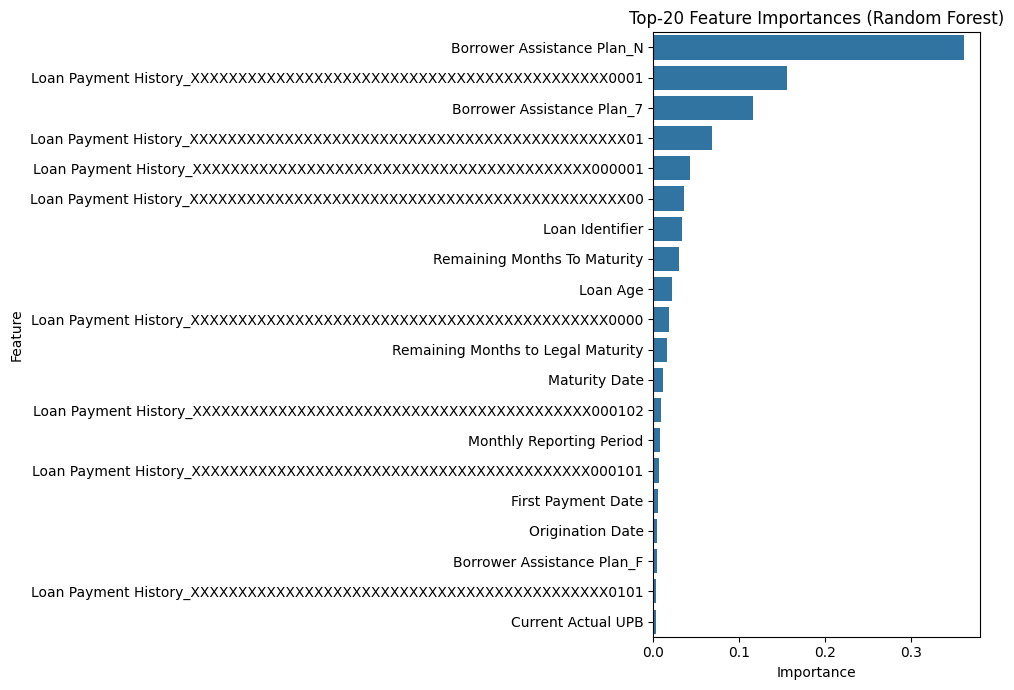

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важности признаков из обученного RandomForest
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=feat_imp.values[:20], y=feat_imp.index[:20])
plt.title("Top-20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [24]:
npl90_count = (df['Current Loan Delinquency Status'] == 3).sum()
npl90_share = (df['Current Loan Delinquency Status'] == 3).mean() * 100

print(f"Количество NPL 90+: {npl90_count}")
print(f"Доля NPL 90+ (%): {npl90_share:.4f}")


Количество NPL 90+: 2
Доля NPL 90+ (%): 0.0004


In [25]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[101202      5]
 [     0    450]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101207
           1       0.99      1.00      0.99       450

    accuracy                           1.00    101657
   macro avg       0.99      1.00      1.00    101657
weighted avg       1.00      1.00      1.00    101657



In [26]:
y_proba = model.predict_proba(X_test)[:, 1]  # вероятность класса 1 (default)


In [27]:
feature_names = list(X_train.columns)
print(feature_names)


['Loan Identifier', 'Monthly Reporting Period', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'First Payment Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LTV)', 'Original Combined Loan to Value Ratio (CLTV)', 'Number of Borrowers', 'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination', 'Number of Units', 'Metropolitan Statistical Area (MSA)', 'Zip Code Short', 'Alternative Delinquency Resolution', 'Payment Deferral Modification Event Indicator', 'Channel_C', 'Channel_R', 'Seller Name_CMG Mortgage, Inc', 'Seller Name_CrossCountry Mortgage, LLC', 'Seller Name_DHI Mortgage Company, Ltd.', 'Seller Name_Flagstar Bank, National Association', 'Seller Name_Guaranteed Rate, Inc.', 'Seller Name_Guild Mortgage Company LLC', 'Seller Name_JPMorgan Chase Bank, National Association', 'Seller Name_Lennar Mortgage, LLC'

In [28]:
import pandas as pd

# Ниже имена признаков (пример — можно заменить на свой X_train.columns)
columns = [
    'Loan Identifier', 'Loan Age', 'Original Interest Rate', 'Current Interest Rate',
    'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date',
    'First Payment Date', 'Remaining Months to Legal Maturity', 'Number of Borrowers',
    'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination',
    'Co-Borrower Credit Score at Origination', 'First Time Home Buyer Indicator',
    'Number of Units', 'Occupancy Status', 'Property State', 'Amortization Type',
    'Prepayment Penalty Indicator', 'Interest Only Loan Indicator', 'Modification Flag',
    'Special Eligibility Program'
]

# Фейковые 5 клиентов
data = [
    [123456, 12, 3.5, 3.5, 150000, 148000, 360, 202001, 202003, 348, 1, 30, 720, 690, 1, 1, 1, 5, 1, 0, 0, 1, 0],
    [223457, 48, 4.2, 4.0, 250000, 200000, 360, 201803, 201805, 312, 2, 40, 660, 650, 0, 2, 0, 10, 2, 0, 1, 0, 1],
    [323458, 6, 5.0, 5.0, 175000, 172000, 240, 202201, 202203, 234, 1, 28, 800, 750, 0, 1, 1, 3, 1, 1, 0, 1, 0],
    [423459, 84, 2.9, 2.8, 300000, 225000, 360, 201501, 201503, 276, 1, 36, 720, 720, 1, 1, 0, 25, 1, 0, 0, 0, 0],
    [523460, 24, 6.2, 6.1, 200000, 198000, 360, 202103, 202105, 336, 2, 35, 670, 600, 0, 2, 1, 48, 2, 0, 1, 1, 1],
]

clients_test = pd.DataFrame(data, columns=columns)
print(clients_test)


   Loan Identifier  Loan Age  Original Interest Rate  Current Interest Rate  \
0           123456        12                     3.5                    3.5   
1           223457        48                     4.2                    4.0   
2           323458         6                     5.0                    5.0   
3           423459        84                     2.9                    2.8   
4           523460        24                     6.2                    6.1   

   Original UPB  Current Actual UPB  Original Loan Term  Origination Date  \
0        150000              148000                 360            202001   
1        250000              200000                 360            201803   
2        175000              172000                 240            202201   
3        300000              225000                 360            201501   
4        200000              198000                 360            202103   

   First Payment Date  Remaining Months to Legal Maturity  ...

In [29]:
clients_test = clients_test.reindex(columns=X_train.columns, fill_value=0)
proba_default = model.predict_proba(clients_test)[:, 1]
clients_test['default_proba'] = proba_default

print(clients_test[['Loan Identifier', 'default_proba']])


   Loan Identifier  default_proba
0           123456           0.27
1           223457           0.22
2           323458           0.29
3           423459           0.22
4           523460           0.23


In [31]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

# === 1. Четко определяем типы признаков ===
num_features = X_train.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print('Числовые и булевы признаки:', num_features)
print('Категориальные признаки:', cat_features)

# === 2. Препроцессор только для числовых и булевых (bool) ===
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features)
    # категориальных нет
])

# === 3. Pipeline: препроцессор + модель ===
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

# === 4. Обучение pipeline ===
pipeline.fit(X_train, y_train)

# === 5. Сохраняем pipeline ===
joblib.dump(pipeline, 'zentro_rf_pipeline.joblib')
print("Pipeline сохранён в файл zentro_rf_pipeline.joblib")

# === 6. Пример применения ===
# pipeline = joblib.load('zentro_rf_pipeline.joblib')
# proba = pipeline.predict_proba(clients_test)[:, 1]
# clients_test['default_proba'] = proba
# print(clients_test[['Loan Identifier', 'default_proba']])


Числовые и булевы признаки: ['Loan Identifier', 'Monthly Reporting Period', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'First Payment Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LTV)', 'Original Combined Loan to Value Ratio (CLTV)', 'Number of Borrowers', 'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination', 'Number of Units', 'Metropolitan Statistical Area (MSA)', 'Zip Code Short', 'Alternative Delinquency Resolution', 'Payment Deferral Modification Event Indicator', 'Channel_C', 'Channel_R', 'Seller Name_CMG Mortgage, Inc', 'Seller Name_CrossCountry Mortgage, LLC', 'Seller Name_DHI Mortgage Company, Ltd.', 'Seller Name_Flagstar Bank, National Association', 'Seller Name_Guaranteed Rate, Inc.', 'Seller Name_Guild Mortgage Company LLC', 'Seller Name_JPMorgan Chase Bank, National Association', 'Selle